### Please use this script for analyzing dataset purpose only. Don't consider the Machine Learning models implementation in this script. Please review COVID_FINAL_10_30.pynb script for machine learning models implementation.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\Soumyashree Sahoo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Soumyashree Sahoo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Soumyashree Sahoo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672
264,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063
266,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,16243,16285,16325,16415,16432,16480,16543,16661,16698,16770


In [3]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1523,1529,1532,1533,1536,1536,1541,1544,1548,1554
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,487,493,499,502,509,518,527,532,536,543
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1931,1941,1949,1956,1964,1973,1980,1980,1999,2011
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,72,72,73,75,75,75,75,75,75,75
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,271,275,275,279,284,286,289,291,296,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,458,465,473,481,483,489,493,501,504,508
264,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
265,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,599,599,599,599,599,600,601,601,601,601
266,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,348,348,348,349,349,349,349,349,349,349


In [4]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,34217,34237,34239,34258,34321,34326,34342,34355,34362,34440
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,10808,10893,11007,11097,11189,11246,11367,11473,11578,11696
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,39444,39635,39635,40014,40201,40395,40577,40577,41001,41244
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,3029,3144,3260,3377,3475,3475,3548,3627,3734,3858
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3647,3693,3736,4107,4523,4920,5172,5230,5266,5350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,44444,44985,45448,45896,46309,46773,47169,47744,48224,48680
251,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
252,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1364,1366,1366,1366,1366,1366,1375,1375,1375,1375
253,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,15481,15559,15585,15600,15680,15733,15733,15763,15819,15827


In [5]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-13-2020.csv')
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-14 04:26:00,33.939110,67.709953,38716,1420,31638,5658.0,Afghanistan,99.454534,3.667734
1,NaN,NaN,NaN,Albania,2020-09-14 04:26:00,41.153300,20.168300,11353,334,6569,4450.0,Albania,394.502745,2.941954
2,NaN,NaN,NaN,Algeria,2020-09-14 04:26:00,28.033900,1.659600,48254,1612,34037,12605.0,Algeria,110.040712,3.340656
3,NaN,NaN,NaN,Andorra,2020-09-14 04:26:00,42.506300,1.521800,1344,53,943,348.0,Andorra,1739.468064,3.943452
4,NaN,NaN,NaN,Angola,2020-09-14 04:26:00,-11.202700,17.873900,3388,134,1301,1953.0,Angola,10.308441,3.955136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,NaN,West Bank and Gaza,2020-09-14 04:26:00,31.952200,35.233200,30574,221,20082,10271.0,West Bank and Gaza,599.323796,0.722836
3950,NaN,NaN,NaN,Western Sahara,2020-09-14 04:26:00,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,NaN,NaN,Yemen,2020-09-14 04:26:00,15.552727,48.516388,2011,583,1212,216.0,Yemen,6.742447,28.990552
3952,NaN,NaN,NaN,Zambia,2020-09-14 04:26:00,-13.133897,27.849332,13539,312,12260,967.0,Zambia,73.645738,2.304454


In [6]:

# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/27/20', '10/28/20', '10/29/20', '10/30/20', '10/31/20', '11/1/20',
       '11/2/20', '11/3/20', '11/4/20', '11/5/20'],
      dtype='object', length=293)

In [7]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [8]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
0,0,0,0,0,0,0,0,0,0,0,...,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935
1,0,0,0,0,0,0,0,0,0,0,...,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721
2,0,0,0,0,0,0,0,0,0,0,...,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169
3,0,0,0,0,0,0,0,0,0,0,...,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135
4,0,0,0,0,0,0,0,0,0,0,...,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,0,0,0,0,0,0,0,0,...,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672
264,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,0,0,0,0,0,0,0,0,0,0,...,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063
266,0,0,0,0,0,0,0,0,0,0,...,16243,16285,16325,16415,16432,16480,16543,16661,16698,16770


In [9]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/27/20', '10/28/20', '10/29/20', '10/30/20', '10/31/20', '11/1/20',
       '11/2/20', '11/3/20', '11/4/20', '11/5/20'],
      dtype='object', length=289)

In [10]:
# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []
brazil_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []
brazil_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []
brazil_recoveries = []

In [11]:
for i in dates:
    confirmed_sum = confirmed[i].sum()                # sum of all confirmed data
    death_sum = deaths[i].sum()                       # sum of all deaths data
    recovered_sum = recoveries[i].sum()               # sum of all recoveries data
    
    world_cases.append(confirmed_sum)                 # add confirmed summed data to world_cases []
    total_deaths.append(death_sum)                    # add deaths summed data to total_deaths []
    total_recovered.append(recovered_sum)             # add recoveries summed data to  total_recovered []
    total_active.append(confirmed_sum-death_sum-recovered_sum)        # total_active = confirmed_sum - death_sum
    
    mortality_rate.append(death_sum/confirmed_sum)         # mortality_rate = death_sum/confirmed_sum
    recovery_rate.append(recovered_sum/confirmed_sum)      # recovery_rate = recovered_sum/confirmed_sum
    
    # confirmed country covid cases of all countries
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())          # total cases reported in USA
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())      
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    brazil_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Brazil'][i].sum())
    
    # reported total deaths of all countries
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    brazil_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Brazil'][i].sum())

    # reported recoveries of all countries
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
    brazil_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Brazil'][i].sum())


### Trying to predict daily increase of world data and country wise confirmed cases

In [12]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [13]:
# daily increase of Covid cases

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)
brazil_daily_increase = daily_increase(brazil_cases)


In [14]:
# deaths  ( daily increase of deaths)

world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)
brazil_daily_death = daily_increase(brazil_deaths)

In [15]:
# daily increase of recoveries for world and individual countries

world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)
brazil_daily_recovery = daily_increase(brazil_recoveries)

In [16]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [17]:
# Unique countries
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [18]:

confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []


# confirmed total cases per country
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    #print(i,'::', cases)
    if cases > 0:
        confirmed_by_country.append(cases)                 # countries with confirmed cases
    else:
        no_cases.append(i)                                 # countries with no confirmed cases

 
# if a country has no confirmed cases remove countries from   unique_countries list     
for i in no_cases:
    unique_countries.remove(i)

    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]       
 

for i in range(len(unique_countries)):
    
    # total confirmed cases of each country
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    
    # total deaths of each country
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    
    # total recovery of each country
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    
    # active cases of each country till date
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    
    # mortality_rate of each country till date
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])
    

In [19]:
# Creating a dataframe with Country Name, Number of confirmed cases, Number of Deaths, Number of recoveries, Number of Active cases,
# Mortality Rate

country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})

# number of cases per country/region
country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,6519665,194071,2451406,3874188,0.029767
1,India,4846427,79722,3780107,986598,0.016450
2,Brazil,4330455,131625,3723206,475624,0.030395
3,Russia,1059024,18517,873684,166823,0.017485
4,Peru,722832,30526,559321,132985,0.042231
5,Colombia,716319,22924,599385,94010,0.032003
6,Mexico,668381,70821,557381,40179,0.105959
7,South Africa,649793,15447,577906,56440,0.023772
8,Spain,566326,29747,150376,386203,0.052526
9,Argentina,555537,11352,419513,124672,0.020434


In [20]:
# unique provinces in latest_data dataset
unique_provinces =  list(latest_data['Province_State'].unique())

In [21]:

confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = []

no_cases = [] 

# sum of confirmed cases by province state
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
        
        
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]

# By province:  total confirmed cases,unique country by province, total death, total recoveries,mortality rate
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])
    

In [22]:

# number of cases per province/state/city  ( creating a new dataframe)
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})

# number of cases per country/region
province_df.style.background_gradient(cmap='Reds')

In [23]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        

# create lists with unique_provinces & confirmed cases by province
unique_provinces = list(unique_provinces)
confirmed_by_province = list(confirmed_by_province)

# delete if there are any nan values
for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)       

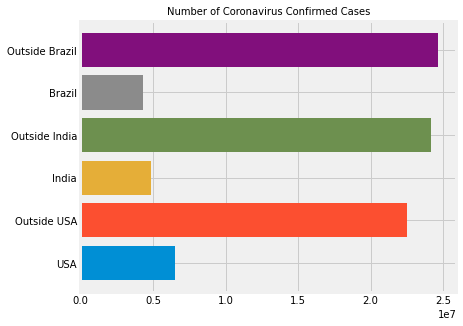

In [24]:


USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(confirmed_by_country) - USA_confirmed

INDIA_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = np.sum(confirmed_by_country) - INDIA_confirmed

BRAZIL_confirmed = latest_data[latest_data['Country_Region']=='Brazil']['Confirmed'].sum()
outside_Brazil_confirmed = np.sum(confirmed_by_country) - BRAZIL_confirmed

plt.figure(figsize=(6, 5))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.barh('India', INDIA_confirmed)
plt.barh('Outside India', outside_India_confirmed)
plt.barh('Brazil', BRAZIL_confirmed)
plt.barh('Outside Brazil', outside_Brazil_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [25]:
print('Outside USA: {} cases'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA: 22477205 cases
USA: 6519665 cases
Total: 28996870 cases


In [26]:

# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

# unique countries & confirmed cases for each country
for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])

# top 10 countries and their respective total confirmed cases    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

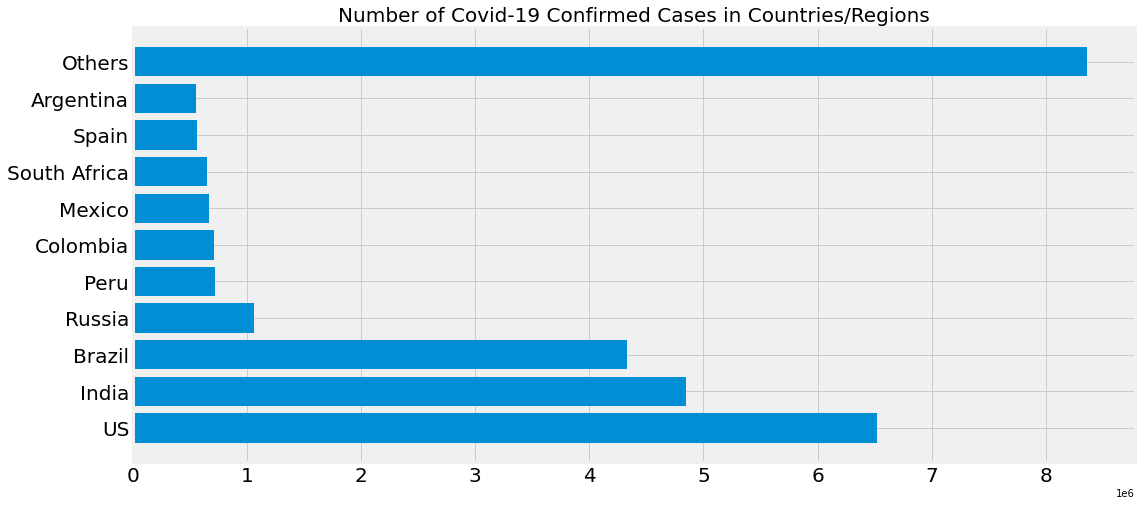

In [27]:
# Bar graph showing confirmed cases of top 10 countries versus all other countries

def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 8))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')   

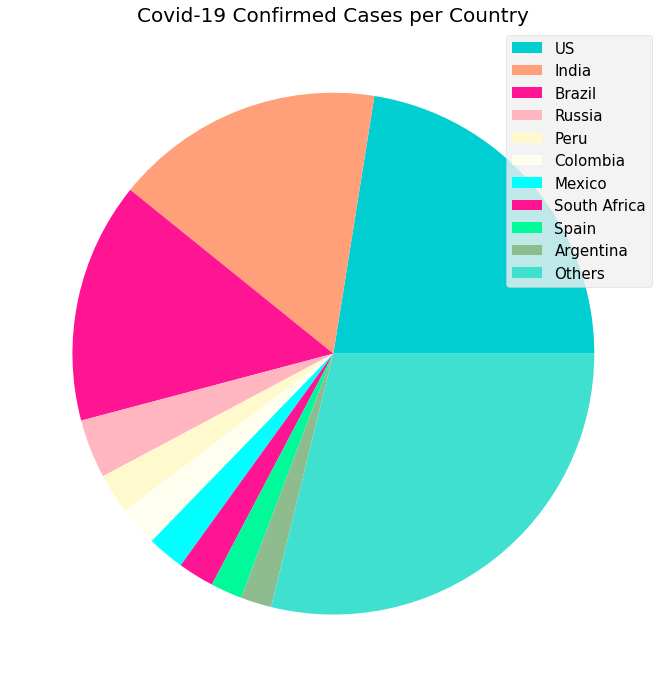

In [28]:
# Pie chart showing confirmed cases of top 10 countries versus all other countries ( same as above but in a pie chart form)
def plot_pie_charts(x, y, title):    
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()
    
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')    
    

In [29]:

# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)


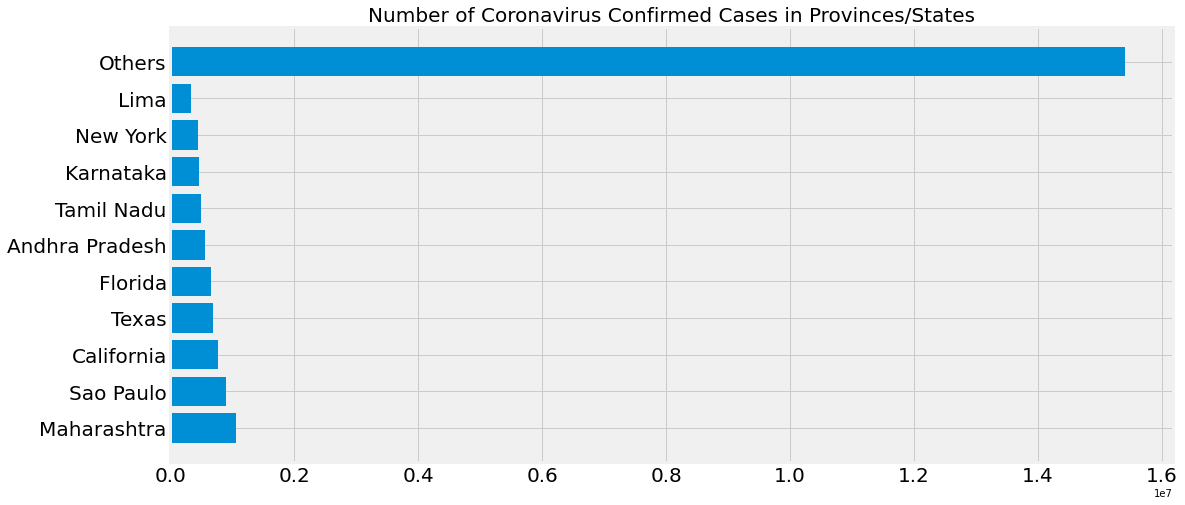

In [30]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [31]:

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 

    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()
    
    # additional province/state will be considered "others"
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

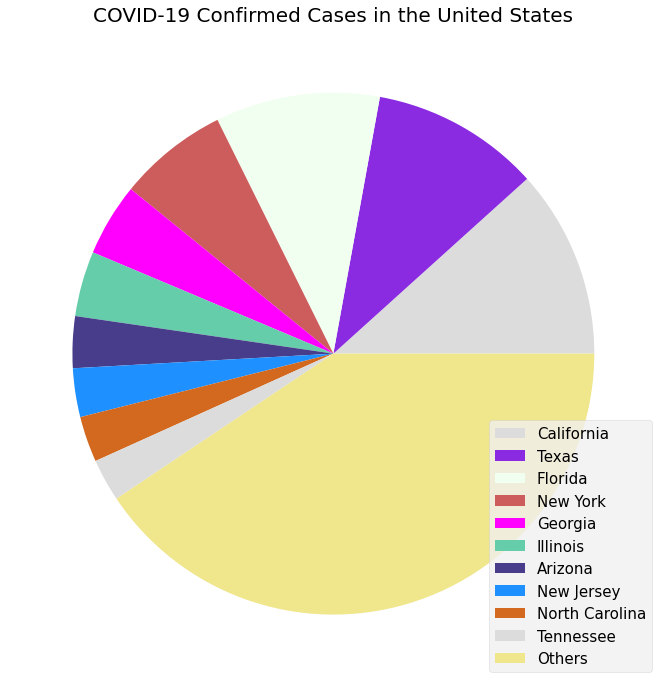

In [32]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

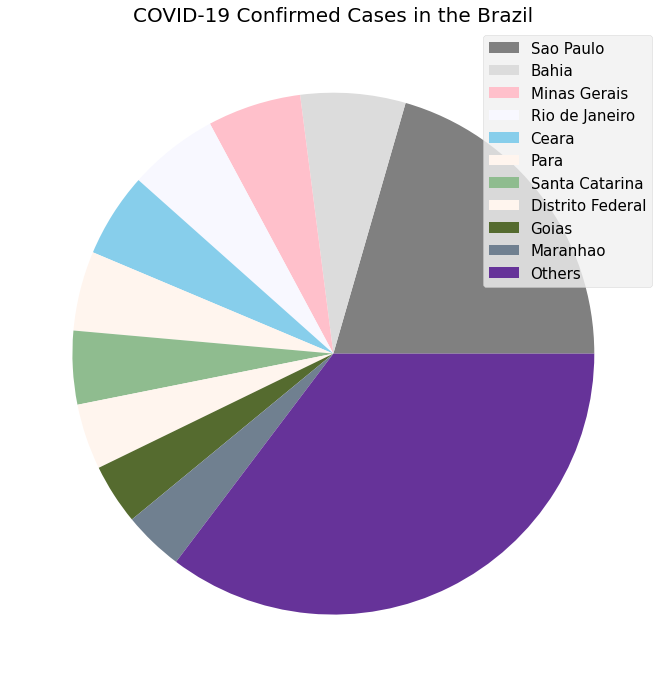

In [33]:
plot_pie_country_with_regions('Brazil', 'COVID-19 Confirmed Cases in the Brazil')

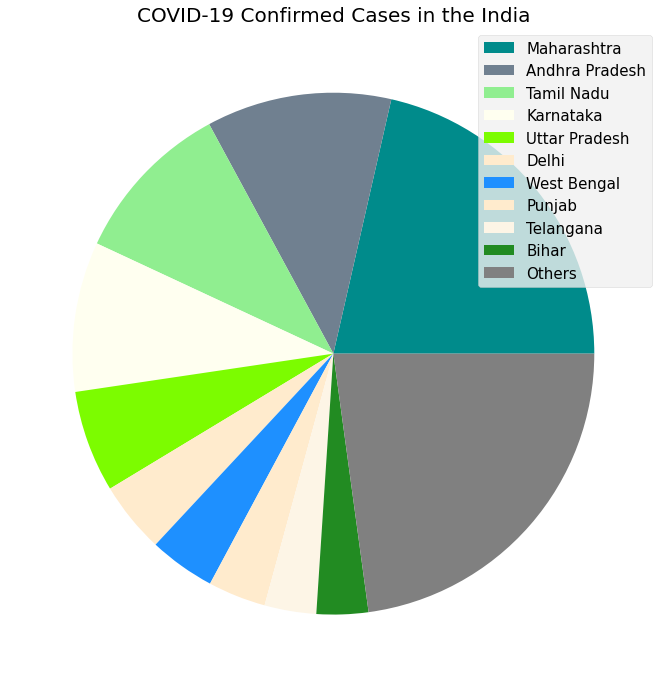

In [34]:
plot_pie_country_with_regions('India', 'COVID-19 Confirmed Cases in the India')

### Predicting the future

In [35]:
# no. of days since 01/22, world cases, total deaths, total recoveries until today
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)       # no. of days since start date of dataset     
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [36]:
# keeping track of dates to forecast
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)   # days including future 20 days
adjusted_dates = future_forecast[:-20]                                                     # days excluding future 20 days 


In [37]:

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')   # 2020-01-22 00:00:00

future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [38]:
study_dates = []
for i in range(len(adjusted_dates)):
    study_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
study_dates                 # dates without including future forecast dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [39]:
future_forecast_dates  # dates to be forecasted for covid prediction  (All dates including future dates to be forecasted)

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

# splitting dataset

In [40]:
# Splitting no. of days for prediction(excluding future 20 days) and world confirmed cases into train and test sets in 75:25 ratio

# Please don't consider this analysis as i have implemented this before getting correct scores
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)


### Polynomial Regression

In [41]:
# transform data for polynomial regression
# Please don't consider this analysis as i have implemented this before getting correct scores

poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)      # fitting model using all dates including future 20 days

In [42]:

# polynomial regression
# Please don't consider this analysis as i have implemented this before getting correct scores

linear_model = LinearRegression(normalize=True, fit_intercept=False)

linear_model.fit(poly_X_train_confirmed, y_train_confirmed)           # model fitting using X_train & y_train

test_linear_pred = linear_model.predict(poly_X_test_confirmed)              # test prediction using X_test

linear_pred = linear_model.predict(poly_future_forecast)                    # linear prediction cases no. prediction using future_forecast

print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
print('R-Squared Score:',r2_score(test_linear_pred, y_test_confirmed))


MAE: 2861948.0237056618
MSE: 10667033210729.936
R-Squared Score: 0.8524392627699964


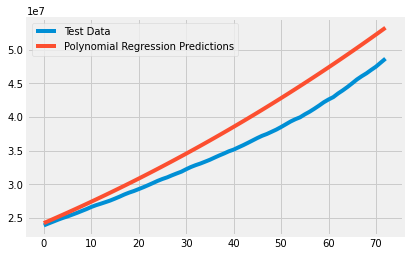

In [43]:
# Please don't consider this analysis as i have implemented this before getting correct scores

plt.plot(y_test_confirmed)       # blue plot: on y_test
plt.plot(test_linear_pred)       # Red plot: on polynomial prediction X_test

plt.legend(['Test Data', 'Polynomial Regression Predictions'])

WHat to learn from above plot?

In [44]:
# svm_confirmed = svm_search.best_estimator_
# Please don't consider this analysis as i have implemented this before getting correct scores

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)    # SVM model created
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)                  # fitting SVM model using X_train & y_train
svm_pred = svm_confirmed.predict(future_forecast)                        # predict SVM using future_forecast



C:\Users\Soumyashree Sahoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE: 33391305.242898934
MSE: 1509284548229591.0
R-Squared Score: -1.098564112986577


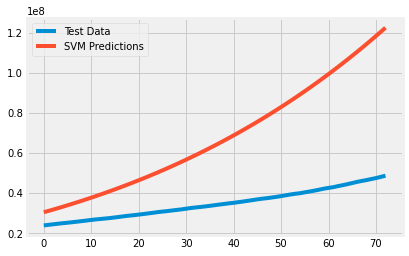

In [45]:
# Please don't consider this analysis as i have implemented this before getting correct scores

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)                       # blue plot: on y_test
plt.plot(svm_test_pred)                          # Red plot: on SVM prediction X_test
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
print('R-Squared Score:',r2_score(svm_test_pred, y_test_confirmed))

#from sklearn.metrics import mean_squared_log_error
#print('Mean Square log error :', mean_squared_log_error(svm_test_pred, y_test_confirmed))

#from sklearn.metrics import median_absolute_error
#print('Median absolute error :', median_absolute_error(svm_test_pred, y_test_confirmed))

#from sklearn.metrics import mean_poisson_deviance
#print('Mean poisson deviance :', mean_poisson_deviance(svm_test_pred, y_test_confirmed))

#from sklearn.metrics import mean_gamma_deviance
#print('Mean gamma deviance :', mean_gamma_deviance(svm_test_pred, y_test_confirmed))

In [46]:
# Future predictions using polynomial regression
# Please don't consider this analysis as i have implemented this before getting correct scores

linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Confirmed Cases Worldwide
0,11/06/2020,53789044.000000
1,11/07/2020,54303820.000000
2,11/08/2020,54821810.000000
3,11/09/2020,55343023.000000
4,11/10/2020,55867470.000000
5,11/11/2020,56395161.000000
6,11/12/2020,56926104.000000
7,11/13/2020,57460311.000000
8,11/14/2020,57997790.000000
9,11/15/2020,58538551.000000


In [47]:
# Future predictions using SVM 
# Please don't consider this analysis as i have implemented this before getting correct scores

svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df.style.background_gradient(cmap='Reds')

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,11/06/2020,124609912.000000
1,11/07/2020,126749060.000000
2,11/08/2020,128917919.000000
3,11/09/2020,131116796.000000
4,11/10/2020,133346002.000000
5,11/11/2020,135605849.000000
6,11/12/2020,137896652.000000
7,11/13/2020,140218729.000000
8,11/14/2020,142572398.000000
9,11/15/2020,144957980.000000


The negative R-squared value means that your prediction tends to be less accurate that the average value of 
the data set over time.

## Analysis using study dates( no future dates) 

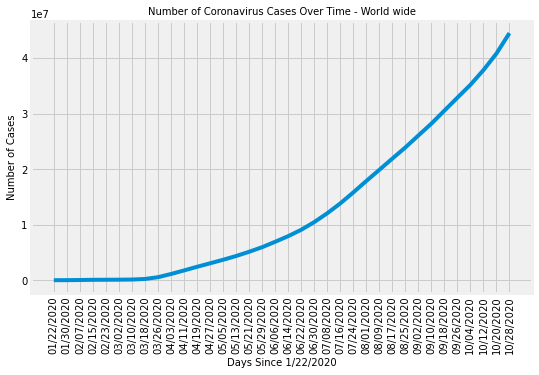

In [48]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]               # # days excluding future days 

plt.figure(figsize=(8,5))
plt.plot(study_dates[0:-1:8], world_cases[0:-1:8])
plt.title('Number of Coronavirus Cases Over Time - World wide', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation = 90)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


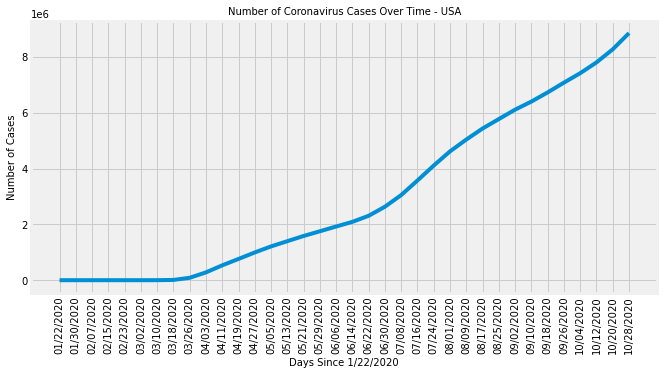

In [49]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]               # # days excluding future days 

plt.figure(figsize=(10,5))
plt.plot(study_dates[0:-1:8], us_cases[0:-1:8])
plt.title('Number of Coronavirus Cases Over Time - USA', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation = 90)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

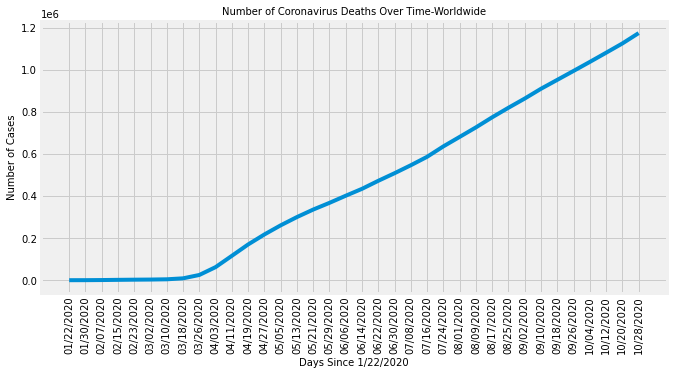

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(study_dates[0:-1:8], total_deaths[0:-1:8])
plt.title('Number of Coronavirus Deaths Over Time-Worldwide', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation = 90)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

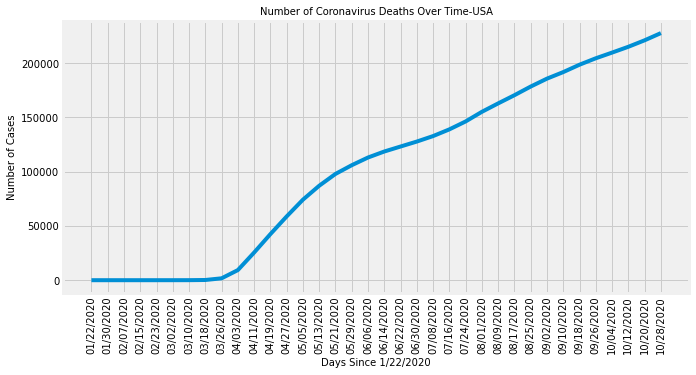

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(study_dates[0:-1:8], us_deaths[0:-1:8])
plt.title('Number of Coronavirus Deaths Over Time-USA', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation = 90)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()



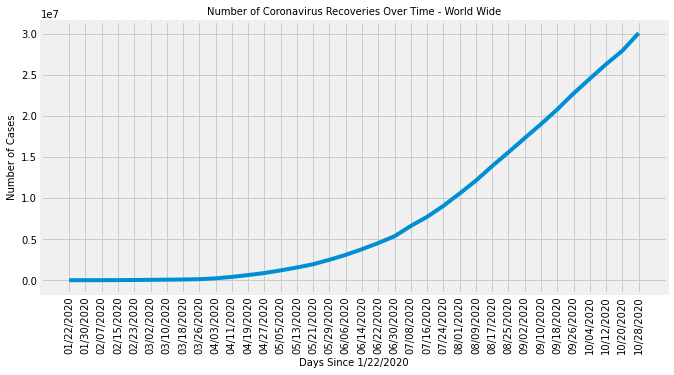

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(study_dates[0:-1:8], total_recovered[0:-1:8])
plt.title('Number of Coronavirus Recoveries Over Time - World Wide', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation = 90)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

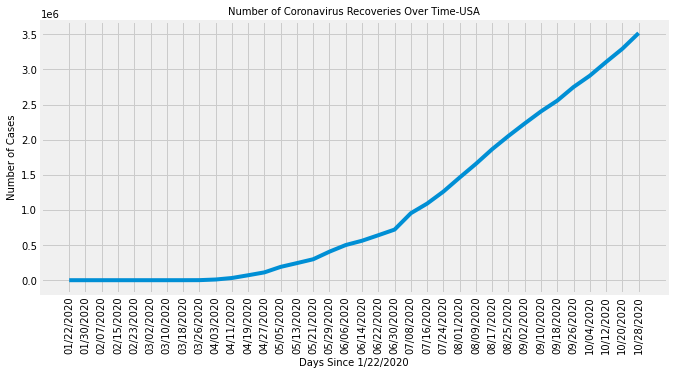

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(study_dates[0:-1:8], us_recoveries[0:-1:8])
plt.title('Number of Coronavirus Recoveries Over Time-USA', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation = 90)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


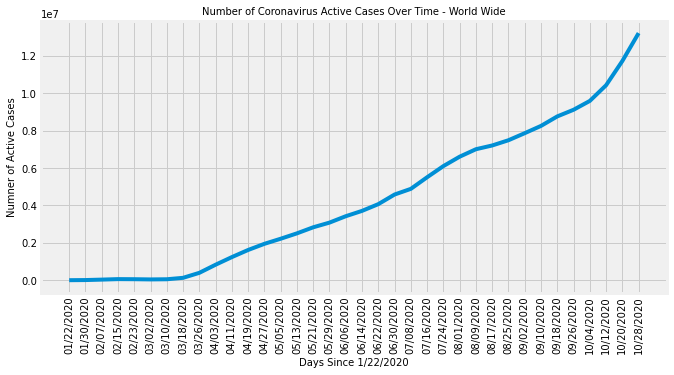

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(study_dates[0:-1:8], total_active[0:-1:8])
plt.title('Number of Coronavirus Active Cases Over Time - World Wide', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Numner of Active Cases', size=10)
plt.xticks(rotation = 90)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

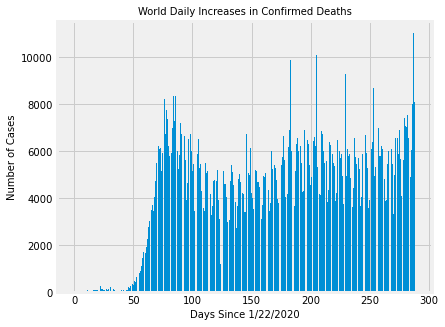

In [55]:
plt.figure(figsize=(6, 5))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

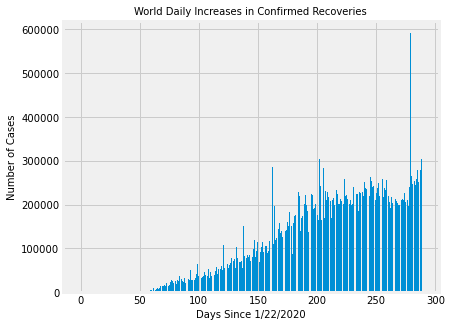

In [56]:
plt.figure(figsize=(6, 5))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

### Prediction without and with models

In [57]:

def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(6, 5))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=10)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

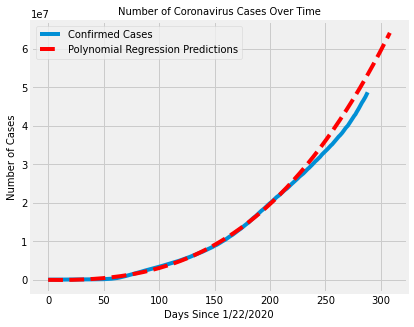

In [58]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')     # plot with poly. regression without future forecast dates

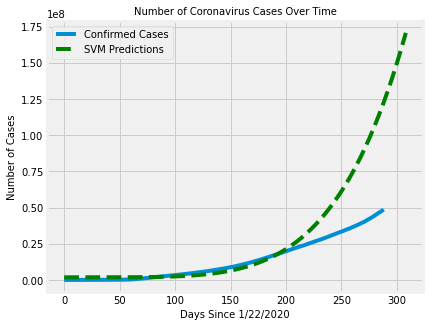

In [59]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')     # using SVM without future forecast dates

In [74]:
# Future predictions using polynomial regression ( only for future 20 days)

linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-7:], 'Linear Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-7:])})
poly_df

,Date,Linear Predicted number of Confirmed Cases Worldwide
0,11/19/2020,60734617.0
1,11/20/2020,61291938.0
2,11/21/2020,61852599.0
3,11/22/2020,62416612.0
4,11/23/2020,62983985.0
5,11/24/2020,63554728.0
6,11/25/2020,64128852.0


In [72]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-7:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-7:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,11/19/2020,154825948.0
1,11/20/2020,157375994.0
2,11/21/2020,159959927.0
3,11/22/2020,162578084.0
4,11/23/2020,165230803.0
5,11/24/2020,167918426.0
6,11/25/2020,170641296.0


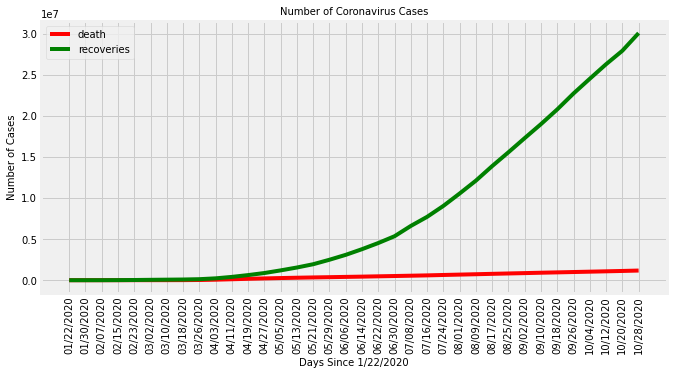

In [62]:
# death versus recoveries plot without including future forecast days
plt.figure(figsize=(10, 5))
plt.plot(study_dates[0:-1:8], total_deaths[0:-1:8], color='r')
plt.plot(study_dates[0:-1:8], total_recovered[0:-1:8], color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=10)
plt.title('Number of Coronavirus Cases', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(size=10)
plt.xticks(rotation = 90)
plt.yticks(size=10)
plt.show()

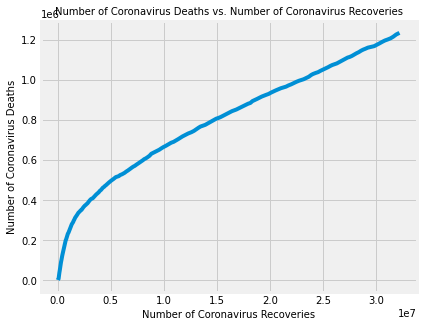

In [63]:

plt.figure(figsize=(6, 5))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=10)
plt.xlabel('Number of Coronavirus Recoveries', size=10)
plt.ylabel('Number of Coronavirus Deaths', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

### Analysing data of China, USA, India

In [64]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(6, 5))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=10)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

    plt.figure(figsize=(6, 5))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=10)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

    plt.figure(figsize=(6, 5))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=10)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

    plt.figure(figsize=(6, 5))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=10)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

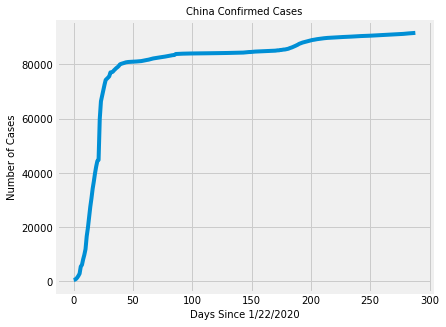

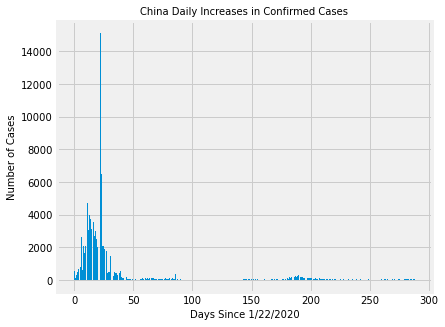

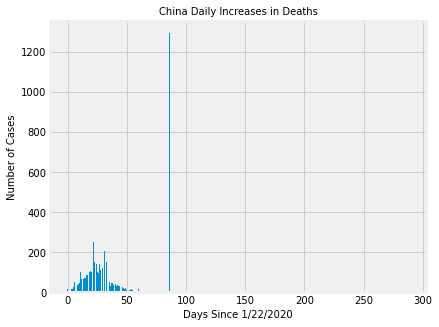

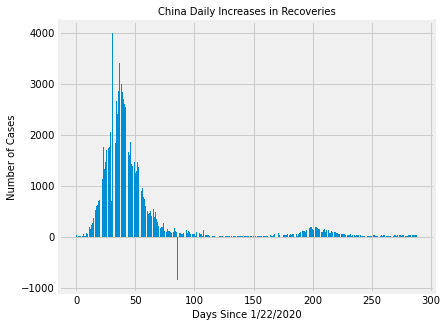

In [65]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')    # no future dates included

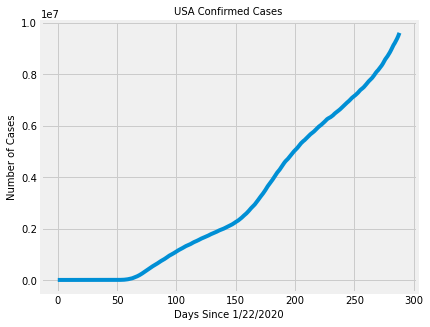

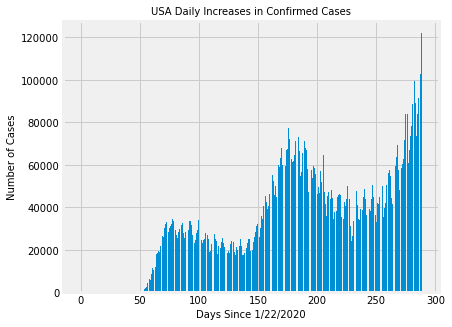

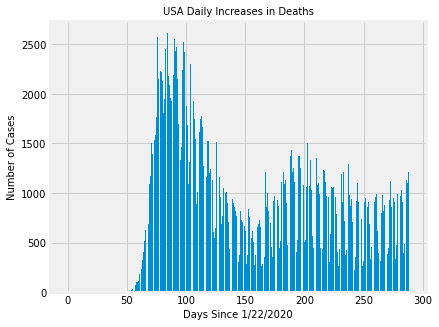

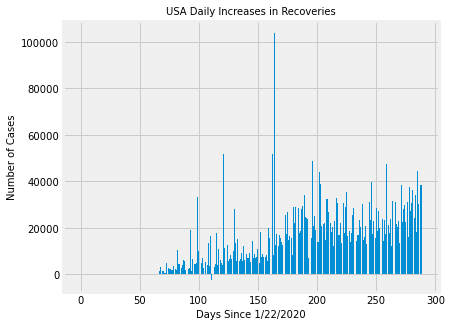

In [66]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'USA')

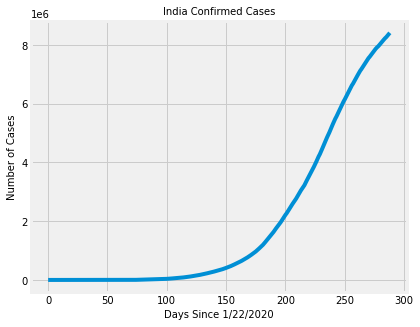

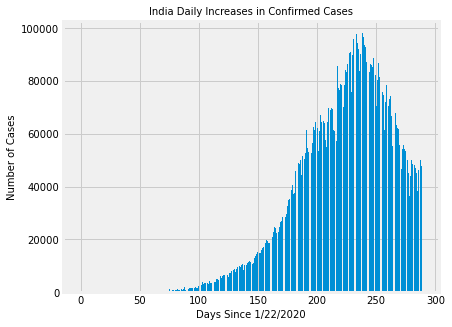

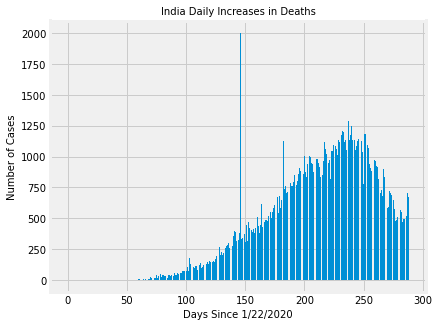

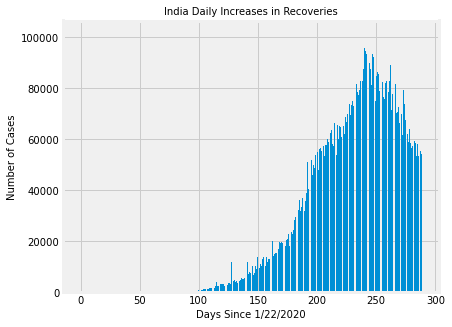

In [67]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

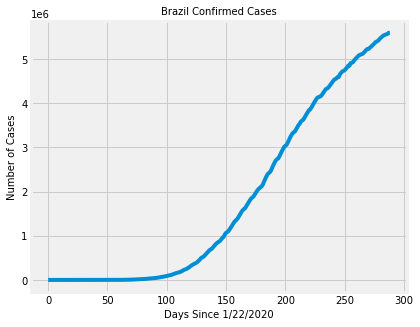

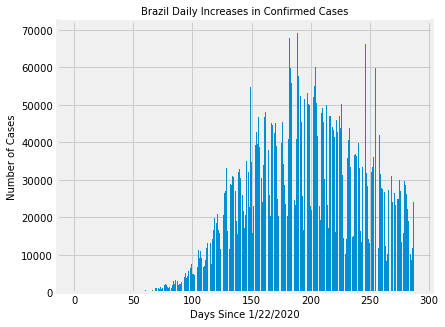

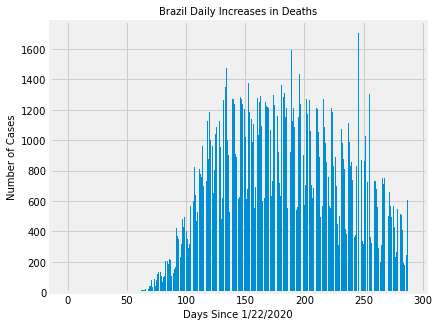

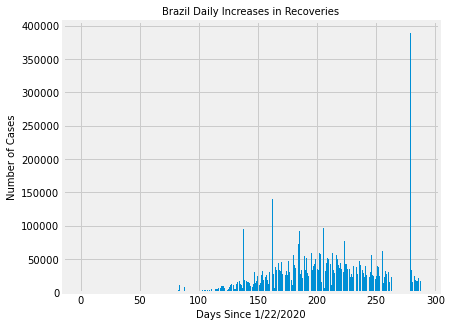

In [68]:
country_plot(adjusted_dates, brazil_cases, brazil_daily_increase, brazil_daily_death, brazil_daily_recovery, 'Brazil') 

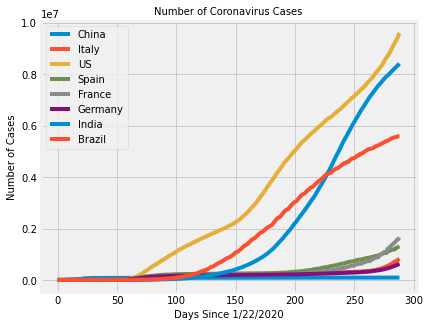

In [69]:
plt.figure(figsize=(6, 5))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.plot(adjusted_dates, brazil_cases)
plt.title('Number of Coronavirus Cases', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India','Brazil'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

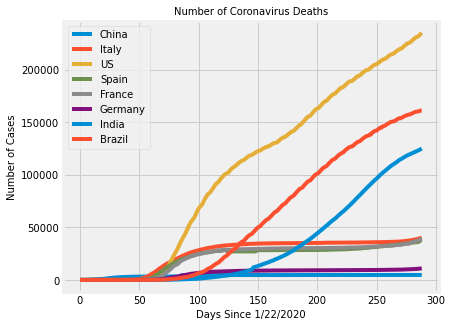

In [70]:
plt.figure(figsize=(6, 5))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.plot(adjusted_dates, brazil_deaths)
plt.title('Number of Coronavirus Deaths', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India', 'Brazil'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

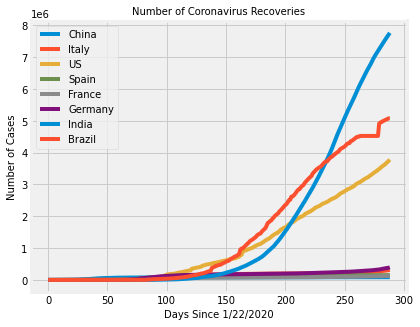

In [71]:
plt.figure(figsize=(6, 5))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.plot(adjusted_dates, brazil_recoveries)
plt.title('Number of Coronavirus Recoveries', size=10)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('Number of Cases', size=10)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India', 'Brazil'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()